<a href="https://colab.research.google.com/github/Calista-F/CCSN-gravitational-wave-denoising/blob/main/20220201_Lopac_(2020)_Table_1%2C2%2C3_recreations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd
from math import log10, sqrt
import cv2
import numpy as np

In [118]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, max_error
import math

def get_rmse(y_target, y_computed):
  RMSE = mean_squared_error(y_target, y_computed, squared=False)
  return RMSE

In [119]:
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [120]:
# Load worksheet
repo = gc.open_by_url('https://docs.google.com/spreadsheets/d/1VB7SaGWtdRc8lsV4EXCRuQfwXWYLnf8KbMgmsqezgZs/edit#gid=1342867710')
worksheet = repo.worksheet('CCSN_signal60_dist5.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

#Test against Lopac 2020


###Table 1. Denoising results for the CCSN signal s20a1o05 at a distance of 5 kpc (SNR = 3.9 dB).

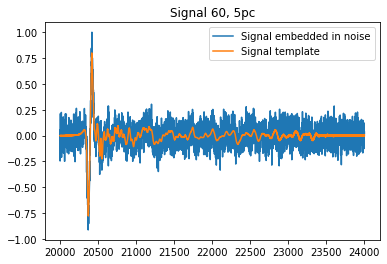

In [121]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.title('Signal 60, 5pc')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

Declare necessary lists for table 1

In [122]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym5','db13','coif1']
levels = [6,5,7]
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 60'
signaldistance = '5 kpc'

Create a main list that appends each line and each metric result

In [123]:
main_list = []
for m in methods:
  cols = []
  for i in range(len(wavelets)):
    #Make a dataframe for the denoised signal of the noisy normalized signal
    denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelets[i], wavelet_levels = levels[i], rescale_sigma = 'True'))
    
    #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
    col1 = [str(m).upper() +', '+ wavelets[i] + ' level ' + str(levels[i])] 
    col1.append(get_rmse(signal_norm_df, denoised_df))
    col1.append(mean_absolute_error(signal_norm_df, denoised_df))
    col1.append(max_error(signal_norm_df, denoised_df))

    #append this column to cols- a list of columns for the table 
    cols.append(col1)
  main_list.append(cols)

FLAG: Loop through **data** dictionary (below)

In [124]:
signalnodistance = signalno+' at '+signaldistance

data = {signalnodistance: metrics,
        #BayesShrink
        main_list[0][0][0]: main_list[0][0][1:], #signal properties to be used as column name
        main_list[0][1][0]: main_list[0][1][1:],
        main_list[0][2][0]: main_list[0][2][1:],

        #VisuShrink
        main_list[1][0][0]: main_list[1][0][1:], #signal properties to be used as column name
        main_list[1][1][0]: main_list[1][1][1:],
        main_list[1][2][0]: main_list[1][2][1:],
        }

# Create DataFrame
Table1_df = pd.DataFrame(data)
 
# Print the output.
Table1_df

,signal 60 at 5 kpc,"BAYESSHRINK, sym5 level 6","BAYESSHRINK, db13 level 5","BAYESSHRINK, coif1 level 7","VISUSHRINK, sym5 level 6","VISUSHRINK, db13 level 5","VISUSHRINK, coif1 level 7"
0,RMSE,0.020220,0.019999,0.023458,0.026325,0.019999,0.028494
1,MAE,0.015235,0.015029,0.017271,0.018474,0.015029,0.020005
2,MAX,0.102869,0.115272,0.222518,0.139652,0.115272,0.150738


###Table 2. Denoising results for the CCSN signal s20a1o05 at a distance of 10 kpc (SNR = −2.11 dB).

In [125]:
# Load worksheet
worksheet = repo.worksheet('CCSN_signal60_dist10.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

Plot the signal and the template embedded (note the lower peaks due to higher distance --> more noise relatively)

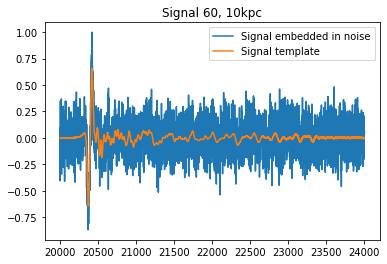

In [126]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.title('Signal 60, 10kpc')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

Declare necessary lists for Table 2

In [127]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym4','db13','coif4']
levels = [6,5,5]
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 60'
signaldistance = '10 kpc'

Create a main list that appends each line and each metric result

In [128]:
main_list = []
for m in methods:
  cols = []
  for i in range(len(wavelets)):
    #Make a dataframe for the denoised signal of the noisy normalized signal
    denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelets[i], wavelet_levels = levels[i], rescale_sigma = 'True'))
    
    #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
    col1 = [str(m).upper() +', '+ wavelets[i] + ' level ' + str(levels[i])] 
    col1.append(get_rmse(signal_norm_df, denoised_df))
    col1.append(mean_absolute_error(signal_norm_df, denoised_df))
    col1.append(max_error(signal_norm_df, denoised_df))

    #append this column to cols- a list of columns for the table 
    cols.append(col1)
  main_list.append(cols)

FLAG: Loop through **data** dictionary (below)

In [129]:
signalnodistance = signalno+' at '+signaldistance

data = {signalnodistance: metrics,
        #BayesShrink
        main_list[0][0][0]: main_list[0][0][1:], #signal properties to be used as column name
        main_list[0][1][0]: main_list[0][1][1:],
        main_list[0][2][0]: main_list[0][2][1:],

        #VisuShrink
        main_list[1][0][0]: main_list[1][0][1:], #signal properties to be used as column name
        main_list[1][1][0]: main_list[1][1][1:],
        main_list[1][2][0]: main_list[1][2][1:],
        }

# Create DataFrame
Table2_df = pd.DataFrame(data)
 
# Print the output.
Table2_df

,signal 60 at 10 kpc,"BAYESSHRINK, sym4 level 6","BAYESSHRINK, db13 level 5","BAYESSHRINK, coif4 level 5","VISUSHRINK, sym4 level 6","VISUSHRINK, db13 level 5","VISUSHRINK, coif4 level 5"
0,RMSE,0.030498,0.028114,0.030966,0.029825,0.028114,0.029792
1,MAE,0.022585,0.021953,0.022651,0.021410,0.021953,0.022080
2,MAX,0.159565,0.109869,0.168393,0.161494,0.109869,0.150269


###Table 3

In [130]:
# Load worksheet
worksheet = repo.worksheet('CCSN_signal60_dist20.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

Plot the signal and the template embedded (note the lower peaks due to higher distance --> more noise relatively)

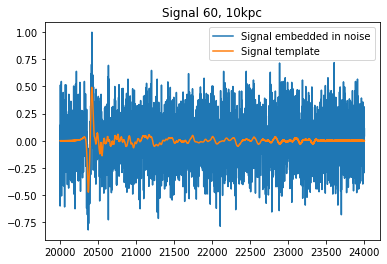

In [131]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.title('Signal 60, 10kpc')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

Declare necessary lists for table 3

In [132]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym3','db3','coif1']
levels = [7,7,7]
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 60'
signaldistance = '20 kpc'

Create a main list that appends each line and each metric result

In [133]:
main_list = []
for m in methods:
  cols = []
  for i in range(len(wavelets)):
    #Make a dataframe for the denoised signal of the noisy normalized signal
    denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelets[i], wavelet_levels = levels[i], rescale_sigma = 'True'))
    
    #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
    col1 = [str(m).upper() +', '+ wavelets[i] + ' level ' + str(levels[i])] 
    col1.append(get_rmse(signal_norm_df, denoised_df))
    col1.append(mean_absolute_error(signal_norm_df, denoised_df))
    col1.append(max_error(signal_norm_df, denoised_df))

    #append this column to cols- a list of columns for the table 
    cols.append(col1)
  main_list.append(cols)

FLAG: Loop through **data** dictionary (below)

In [134]:
signalnodistance = signalno+' at '+signaldistance

data = {signalnodistance: metrics,
        #BayesShrink
        main_list[0][0][0]: main_list[0][0][1:], #signal properties to be used as column name
        main_list[0][1][0]: main_list[0][1][1:],
        main_list[0][2][0]: main_list[0][2][1:],

        #VisuShrink
        main_list[1][0][0]: main_list[1][0][1:], #signal properties to be used as column name
        main_list[1][1][0]: main_list[1][1][1:],
        main_list[1][2][0]: main_list[1][2][1:],
        }

# Create DataFrame
Table3_df = pd.DataFrame(data)
 
# Print the output.
Table3_df

,signal 60 at 20 kpc,"BAYESSHRINK, sym3 level 7","BAYESSHRINK, db3 level 7","BAYESSHRINK, coif1 level 7","VISUSHRINK, sym3 level 7","VISUSHRINK, db3 level 7","VISUSHRINK, coif1 level 7"
0,RMSE,0.037043,0.037043,0.038381,0.031367,0.031367,0.033407
1,MAE,0.027470,0.027470,0.026998,0.020919,0.020919,0.020799
2,MAX,0.194454,0.194454,0.289016,0.224323,0.224323,0.327023


======================================================================================================

NEXT STEPS:

1. Make a function just gives the table after inputting the signal, distance, and denoising properties
2. Loop through all denoising properties to find the best ones
3. Loop through the table-making (flagged)

*denoising properties-wavelet and level

======================================================================================================